In [29]:
import numpy as np
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt

# Get results DT

In [30]:
import numpy as np
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt

In [31]:
dire_repo = '/home/mongardi/tree-based-models/prior_tree_models_repo'
file_path = os.path.join(dire_repo,"results/txt/BRCA_dt.txt")

In [32]:
max_features_values = ['sqrt', '1000', '2000', '5000', '10000', 'None']
configurations = ['baseline', 'impurity improvement (II)', 'feature sampling (FS)', 'ALL']

In [33]:
#colors =  ['#595959', '#006BA4', '#ABABAB', '#A2C8EC', '#FF800E', '#5F9ED1', '#C85200', '#898989', '#FFBC79', '#CFCFCF']
colors = ['navy', '#C85200',  '#006BA4', '#595959']

In [34]:
with open(file_path, "r") as f:
    lines = f.readlines()
    lines = [l.strip() for l in lines]

In [35]:
all_values = []
for i,line in enumerate(lines):
    if line.startswith("MEAN"):
    
        acc = round(float(lines[i+1].split(": ")[1].strip()), 4)
        f1 = round(float(lines[i+2].split(": ")[1].strip()), 4)
        pre = round(float(lines[i+3].split(": ")[1].strip()), 4)
        rec = round(float(lines[i+4].split(": ")[1].strip()), 4)
        acc_std = round(float(lines[i+7].split(": ")[1].strip()), 4)
        f1_std = round(float(lines[i+8].split(": ")[1].strip()), 4)
        pre_std = round(float(lines[i+9].split(": ")[1].strip()), 4)
        rec_std = round(float(lines[i+10].split(": ")[1].strip()), 4)
    
        values = [acc, acc_std, f1, f1_std, pre, pre_std, rec, rec_std]
        all_values.append(values)

In [36]:
dict_df_p = {k:[] for k in configurations}
intervals = list(range(0, len(all_values), 6))
print(intervals)
for k, i in enumerate(intervals):
    for j in range(len(max_features_values)):
        dict_df_p[configurations[k]].append(all_values[i+j])
   

[0, 6, 12, 18]


In [38]:
accuracy_scores = []
accuracy_stds = []
f1_scores = []
f1_stds = []
for config in configurations:
    accuracy_scores.append([dict_df_p[config][i][0] for i in range(len(max_features_values))])
    accuracy_stds.append([dict_df_p[config][i][1] for i in range(len(max_features_values))])
    f1_scores.append([dict_df_p[config][i][2] for i in range(len(max_features_values))])
    f1_stds.append([dict_df_p[config][i][3] for i in range(len(max_features_values))])

In [39]:
dire_results = os.path.join(dire_repo,'results/BRCA/plots')

In [40]:
accuracy_scores

[[0.7228, 0.7782, 0.7911, 0.805, 0.8193, 0.8178],
 [0.7277, 0.7723, 0.7847, 0.7931, 0.8168, 0.8406],
 [0.7208, 0.75, 0.7911, 0.8158, 0.8282, 0.8198],
 [0.7208, 0.7713, 0.7777, 0.8089, 0.8158, 0.8426]]

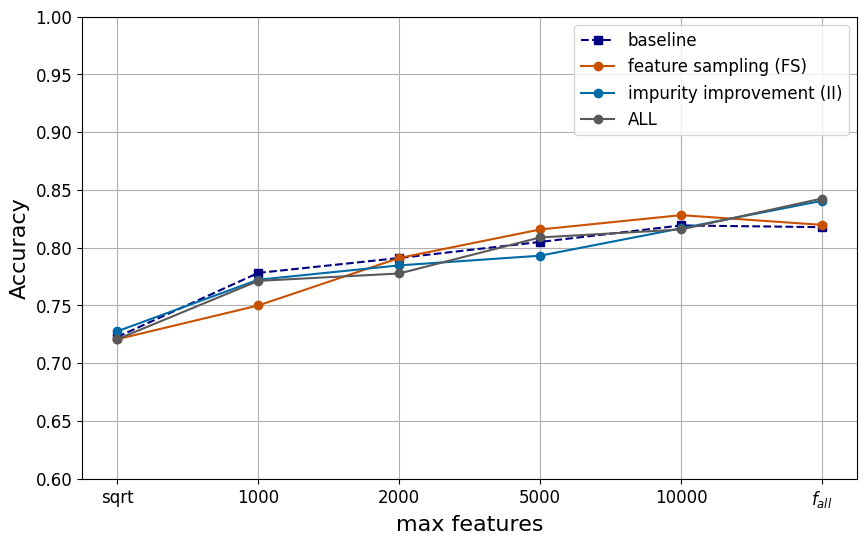

In [41]:
accuracy_scores_new = [[0.7228, 0.7782, 0.7911, 0.805, 0.8193, 0.8178],
[0.7208, 0.75, 0.7911, 0.8158, 0.8282, 0.8198],
[0.7277, 0.7723, 0.7847, 0.7931, 0.8168, 0.8406],
[0.7208, 0.7713, 0.7777, 0.8089, 0.8158, 0.8426]]

configurations = ['baseline', 'feature sampling (FS)', 'impurity improvement (II)', 'ALL']
# Plot Accuracy
max_features_values = ['sqrt', '1000', '2000', '5000', '10000', '$f_{all}$']
plt.figure(figsize=(10, 6))
for i,accuracies in enumerate(accuracy_scores_new):

    if configurations[i] == "baseline":
        plt.plot(max_features_values, accuracies, marker='s', label=configurations[i], color=colors[i], linestyle='--')
    
    else:
        plt.plot(max_features_values, accuracies, marker='o', label=configurations[i], color=colors[i])
    #plt.fill_between(max_features_values, np.array(accuracies) - np.array(accuracy_stds[i]), np.array(accuracies) + np.array(accuracy_stds[i]), alpha=0.2)
plt.xlabel("max features", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
#plt.title("Accuracy across n_estimators for each configuration")
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.ylim(0.60, 1)
plt.savefig(os.path.join(dire_results,"accuracy_dt.pdf"), format='pdf', bbox_inches='tight',pad_inches = 0, dpi=1200)

In [42]:
dire_results

'/home/mongardi/tree-based-models/prior_tree_models_repo/results/BRCA/plots'

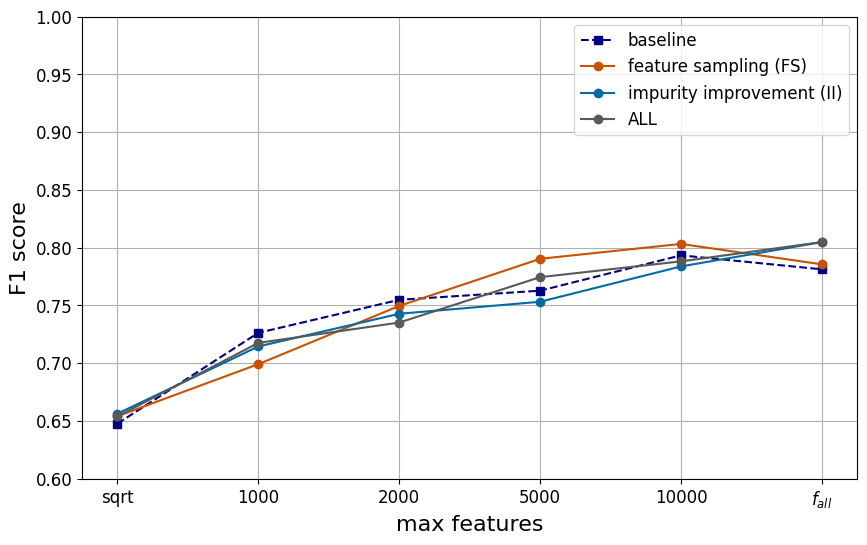

In [14]:
# Plot Accuracy
f1_scores_new = [[0.6477, 0.7263, 0.7549, 0.7628, 0.7934, 0.7813],
 [0.6541, 0.6992, 0.7496, 0.7904, 0.8033, 0.7856],
 [0.6563, 0.7145, 0.7428, 0.7532, 0.7838, 0.8049],
 [0.6539, 0.7176, 0.7352, 0.7745, 0.7882, 0.8049]]
plt.figure(figsize=(10, 6))
for i,accuracies in enumerate(f1_scores_new):
    if configurations[i] == "baseline":
        plt.plot(max_features_values, accuracies, marker='s', label=configurations[i], color=colors[i], linestyle='--')
    
    else:
        plt.plot(max_features_values, accuracies, marker='o', label=configurations[i], color=colors[i])
    #plt.fill_between(max_features_values, np.array(accuracies) - np.array(f1_stds[i]), np.array(accuracies) + np.array(f1_stds[i]), alpha=0.2)
plt.xlabel("max features", fontsize=16)
plt.ylabel("F1 score", fontsize=16)
#plt.title("Accuracy across n_estimators for each configuration")
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0.60, 1)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(os.path.join(dire_results,"f1_dt.pdf"), format='pdf', bbox_inches='tight',pad_inches = 0, dpi=1200)

# Plot results biological validation

In [15]:
import numpy as np
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt
import json

In [16]:
colors = ['navy', '#C85200',  '#006BA4', '#595959']

In [17]:
max_features_values = ['sqrt', '1000', '2000', '5000', '10000', 'None']
configurations = ['baseline', 'impurity improvement (II)', 'feature sampling (FS)', 'ALL']

In [18]:
dire_results = os.path.join(dire_repo,'results/BRCA/plots')

In [19]:
results = {'imp_5000.json': {'genes': [43, 38, 40, 40, 33, 38, 44, 36, 40, 39], 'cancer': [6, 1, 3, 6, 2, 8, 6, 4, 7, 5], 'disease': [2, 0, 1, 1, 0, 1, 0, 2, 3, 4], 'malacards': [8, 7, 6, 6, 6, 7, 2, 5, 9, 6]}, 'all_5000.json': {'genes': [43, 45, 41, 36, 41, 42, 35, 40, 38, 38], 'cancer': [6, 2, 1, 3, 5, 8, 5, 6, 2, 6], 'disease': [2, 1, 1, 1, 1, 5, 3, 5, 1, 4], 'malacards': [8, 4, 5, 7, 4, 8, 6, 8, 6, 10]}, 'no_gis_5000.json': {'genes': [44, 37, 39, 36, 34, 42, 43, 34, 37, 36], 'cancer': [2, 2, 1, 4, 1, 1, 4, 6, 2, 2], 'disease': [0, 0, 1, 3, 0, 0, 2, 4, 2, 4], 'malacards': [3, 8, 5, 5, 5, 3, 7, 4, 4, 6]}, 'fs_5000.json': {'genes': [44, 43, 37, 37, 44, 35, 36, 35, 42, 40], 'cancer': [3, 6, 4, 4, 5, 4, 4, 4, 5, 6], 'disease': [1, 1, 4, 1, 0, 3, 2, 4, 3, 3], 'malacards': [7, 6, 5, 8, 6, 6, 8, 10, 9, 10]}}
results_all = [{'imp_5000.json': {'genes': [39.1, 3.0149626863362675, 39.5, 33, 44], 'cancer': [4.8, 2.1354156504062622, 5.5, 1, 8], 'disease': [1.4, 1.2806248474865698, 1.0, 0, 4], 'malacards': [6.2, 1.7776388834631176, 6.0, 2, 9]}, 
'all_5000.json': {'genes': [39.9, 2.981610303175115, 40.5, 35, 45], 'cancer': [4.4, 2.154065922853802, 5.0, 1, 8], 'disease': [2.4, 1.6248076809271923, 1.5, 1, 5], 'malacards': [6.6, 1.8547236990991407, 6.5, 4, 10]}, 
'no_gis_5000.json': {'genes': [38.2, 3.4583232931581165, 37.0, 34, 44], 'cancer': [2.5, 1.5652475842498528, 2.0, 1, 6], 'disease': [1.6, 1.562049935181331, 1.5, 0, 4], 'malacards': [5.0, 1.5491933384829668, 5.0, 3, 8]}, 
'fs_5000.json': {'genes': [39.3, 3.5227829907617076, 38.5, 35, 44], 'cancer': [4.5, 0.9219544457292888, 4.0, 3, 6], 'disease': [2.2, 1.32664991614216, 2.5, 0, 4], 'malacards': [7.5, 1.6881943016134133, 7.5, 5, 10]}}, 
{'all_10000.json': {'genes': [34.7, 2.0024984394500787, 34.5, 32, 38], 'cancer': [4.0, 1.5491933384829668, 4.0, 1, 6], 'disease': [2.7, 1.4177446878757827, 2.0, 1, 5], 'malacards': [6.2, 1.469693845669907, 6.5, 3, 8]},
 'fs_10000.json': {'genes': [36.0, 2.23606797749979, 35.0, 33, 40], 'cancer': [2.8, 1.2489995996796797, 3.0, 1, 6], 'disease': [2.1, 1.044030650891055, 2.0, 1, 4], 'malacards': [6.3, 1.2688577540449522, 6.0, 5, 9]}, 
 'no_gis_10000.json': {'genes': [34.2, 2.4413111231467406, 34.0, 31, 38], 'cancer': [3.5, 1.3601470508735443, 3.5, 1, 6], 'disease': [1.9, 1.044030650891055, 2.0, 0, 3], 'malacards': [5.6, 1.2806248474865698, 5.0, 4, 8]}, 
 'imp_10000.json': {'genes': [35.0, 1.6733200530681511, 34.5, 32, 38], 'cancer': [3.8, 1.077032961426901, 4.0, 2, 6], 'disease': [2.5, 0.806225774829855, 2.5, 1, 4], 'malacards': [6.4, 1.8, 7.0, 3, 9]}},
{'no_gis_None.json': {'genes': [34.0, 0.0, 34.0, 34, 34], 'cancer': [2.2, 0.6, 2.0, 1, 3], 'disease': [2.0, 0.8944271909999159, 2.0, 1, 4], 'malacards': [5.4, 0.4898979485566356, 5.0, 5, 6]}, 
'fs_None.json': {'genes': [34.0, 0.0, 34.0, 34, 34], 'cancer': [2.4, 1.019803902718557, 2.0, 1, 4], 'disease': [1.6, 0.48989794855663565, 2.0, 1, 2], 'malacards': [5.2, 0.9797958971132713, 5.0, 4, 7]}, 
'all_None.json': {'genes': [33.9, 0.3, 34.0, 33, 34], 'cancer': [2.5, 0.806225774829855, 2.0, 2, 4], 'disease': [2.2, 0.39999999999999997, 2.0, 2, 3], 'malacards': [7.0, 0.4472135954999579, 7.0, 6, 8]}, 
'imp_None.json': {'genes': [34.0, 0.0, 34.0, 34, 34], 'cancer': [2.8, 0.8717797887081347, 2.5, 2, 4], 'disease': [2.4, 0.48989794855663565, 2.0, 2, 3], 'malacards': [7.1, 0.9433981132056604, 7.0, 6, 9]}},
{'fs_2000.json': {'genes': [47.3, 2.6095976701399777, 47.5, 41, 51], 'cancer': [4.4, 2.1071307505705477, 4.5, 1, 8], 'disease': [2.0, 1.4142135623730951, 1.5, 0, 5], 'malacards': [6.8, 1.4696938456699067, 7.0, 4, 8]},
 'no_gis_2000.json': {'genes': [44.9, 4.548626166217663, 44.0, 39, 56], 'cancer': [5.3, 2.0518284528683193, 5.0, 2, 9], 'disease': [1.6, 1.4966629547095767, 1.5, 0, 5], 'malacards': [6.2, 1.98997487421324, 6.5, 2, 9]}, 
 'all_2000.json': {'genes': [46.3, 2.5317977802344327, 46.5, 41, 50], 'cancer': [5.7, 1.791647286716892, 6.0, 2, 8], 'disease': [2.3, 1.1, 2.0, 1, 4], 'malacards': [7.5, 1.02469507659596, 8.0, 5, 9]}, 
 'imp_2000.json': {'genes': [44.0, 4.669047011971501, 43.5, 36, 51], 'cancer': [5.3, 1.2688577540449522, 5.5, 3, 7], 'disease': [2.4, 0.9165151389911681, 2.5, 1, 4], 'malacards': [7.0, 2.32379000772445, 6.5, 3, 11]}},
 {'imp_1000.json': {'genes': [52.2, 3.8678159211627436, 53.5, 43, 56], 'cancer': [4.3, 1.676305461424021, 5.0, 1, 6], 'disease': [1.8, 1.1661903789690602, 1.5, 0, 4], 'malacards': [4.6, 1.2806248474865698, 4.0, 3, 7]}, 
 'all_1000.json': {'genes': [53.8, 3.0919249667480613, 53.0, 48, 60], 'cancer': [6.1, 2.1656407827707715, 6.0, 4, 11], 'disease': [2.1, 1.57797338380595, 1.5, 0, 5], 'malacards': [9.1, 2.071231517720798, 8.5, 6, 13]}, 
 'no_gis_1000.json': {'genes': [52.0, 3.7416573867739413, 53.0, 44, 57], 'cancer': [3.1, 1.3, 3.0, 1, 5], 'disease': [1.7, 1.1874342087037917, 1.0, 0, 4], 'malacards': [5.8, 1.8330302779823362, 5.5, 3, 9]}, 
 'fs_1000.json': {'genes': [52.4, 3.3226495451672298, 53.5, 46, 57], 'cancer': [5.5, 2.29128784747792, 5.5, 2, 10], 'disease': [2.3, 1.2688577540449522, 2.5, 0, 4], 'malacards': [7.5, 2.5787593916455256, 7.5, 3, 12]}},
{'imp_sqrt.json': {'genes': [74.6, 3.7202150475476548, 74.5, 70, 81], 'cancer': [6.2, 2.4819347291981715, 5.0, 3, 11], 'disease': [1.8, 1.4000000000000001, 1.0, 0, 5], 'malacards': [8.2, 2.08806130178211, 8.0, 5, 13]}, 
'all_sqrt.json': {'genes': [72.0, 4.1952353926806065, 71.5, 66, 78], 'cancer': [7.2, 2.4413111231467406, 7.0, 3, 11], 'disease': [2.4, 1.2, 2.5, 0, 4], 'malacards': [8.2, 2.1354156504062622, 8.0, 5, 13]}, 
'no_gis_sqrt.json': {'genes': [75.9, 4.867237409455183, 76.5, 69, 83], 'cancer': [6.3, 2.193171219946131, 6.0, 3, 10], 'disease': [2.4, 1.2806248474865698, 2.0, 1, 5], 'malacards': [6.4, 2.2, 6.5, 1, 9]},
'fs_sqrt.json': {'genes': [71.7, 5.404627646748664, 71.5, 63, 80], 'cancer': [6.1, 2.3853720883753127, 5.5, 3, 11], 'disease': [2.4, 2.0591260281974, 2.0, 0, 6], 'malacards': [7.0, 2.0976176963403033, 6.5, 4, 11]}}]

In [20]:
results_all_plots = {}
results_all_plots ['5000'] = results_all[0]
results_all_plots ['10000'] = results_all[1]
results_all_plots ['None'] = results_all[2]
results_all_plots ['2000'] = results_all[3]
results_all_plots ['1000'] = results_all[4]
results_all_plots ['sqrt'] = results_all[5]

In [21]:
results_all_plots

{'5000': {'imp_5000.json': {'genes': [39.1, 3.0149626863362675, 39.5, 33, 44],
   'cancer': [4.8, 2.1354156504062622, 5.5, 1, 8],
   'disease': [1.4, 1.2806248474865698, 1.0, 0, 4],
   'malacards': [6.2, 1.7776388834631176, 6.0, 2, 9]},
  'all_5000.json': {'genes': [39.9, 2.981610303175115, 40.5, 35, 45],
   'cancer': [4.4, 2.154065922853802, 5.0, 1, 8],
   'disease': [2.4, 1.6248076809271923, 1.5, 1, 5],
   'malacards': [6.6, 1.8547236990991407, 6.5, 4, 10]},
  'no_gis_5000.json': {'genes': [38.2, 3.4583232931581165, 37.0, 34, 44],
   'cancer': [2.5, 1.5652475842498528, 2.0, 1, 6],
   'disease': [1.6, 1.562049935181331, 1.5, 0, 4],
   'malacards': [5.0, 1.5491933384829668, 5.0, 3, 8]},
  'fs_5000.json': {'genes': [39.3, 3.5227829907617076, 38.5, 35, 44],
   'cancer': [4.5, 0.9219544457292888, 4.0, 3, 6],
   'disease': [2.2, 1.32664991614216, 2.5, 0, 4],
   'malacards': [7.5, 1.6881943016134133, 7.5, 5, 10]}},
 '10000': {'all_10000.json': {'genes': [34.7,
    2.0024984394500787,
    34

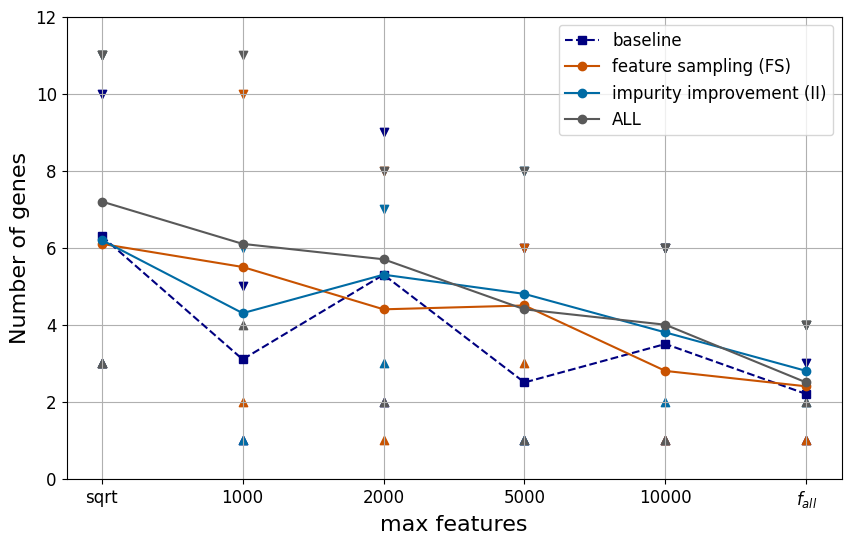

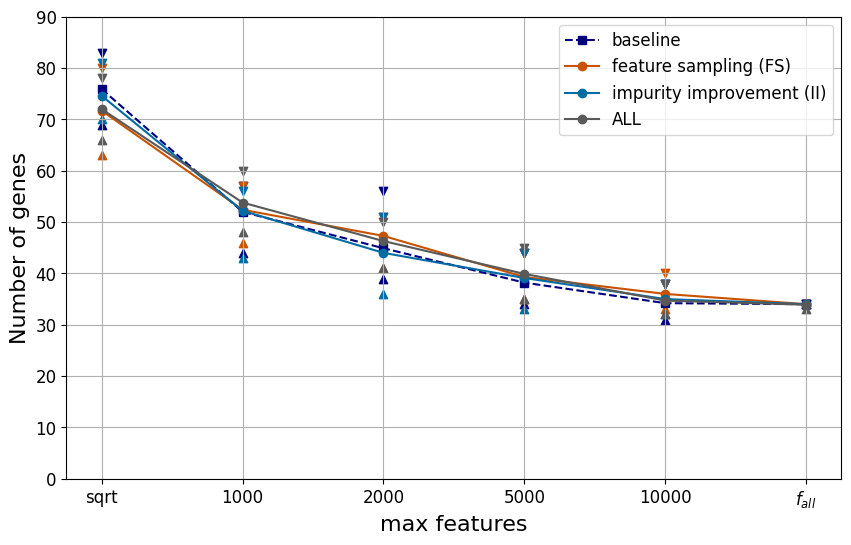

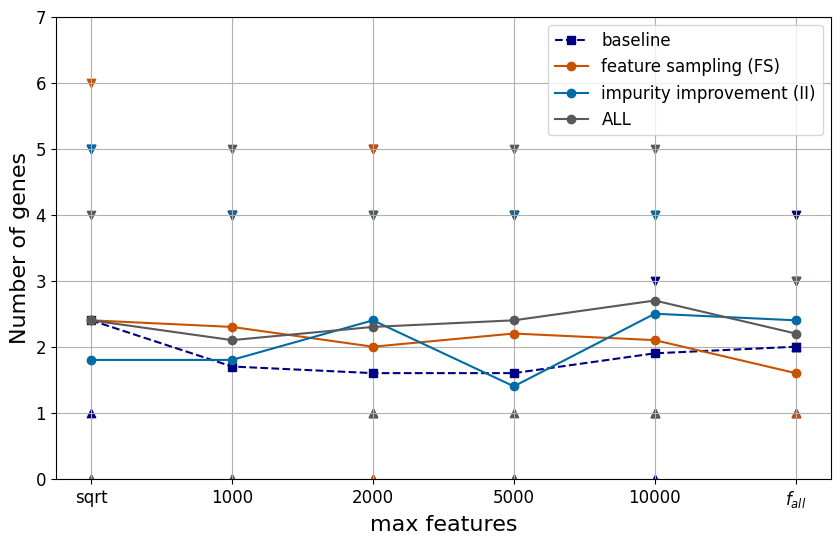

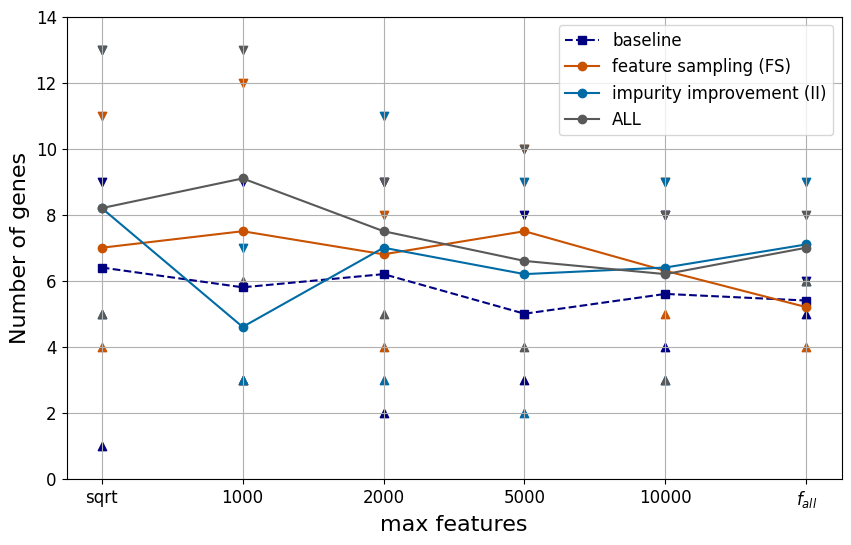

In [22]:
max_features_values_new = ['sqrt', '1000', '2000', '5000', '10000', '$f_{all}$']
configurations = ['baseline', 'feature sampling (FS)', 'impurity improvement (II)', 'ALL']
y_lims = [[0, 12], [0, 90], [0, 7], [0, 14]]
plots_keys = ['cancer', 'genes', 'disease', 'malacards']
for j,pk in enumerate(plots_keys):

    mean_values = {config: [] for config in configurations}
    min_values = {config: [] for config in configurations}
    max_values = {config: [] for config in configurations}
    for max_features in max_features_values:
        mean_values['ALL'].append(results_all_plots[max_features]['all_' + max_features +'.json'][pk][0])
        min_values['ALL'].append(results_all_plots[max_features]['all_' + max_features +'.json'][pk][3])
        max_values['ALL'].append(results_all_plots[max_features]['all_' + max_features +'.json'][pk][4])

        mean_values['baseline'].append(results_all_plots[max_features]['no_gis_' + max_features +'.json'][pk][0])
        min_values['baseline'].append(results_all_plots[max_features]['no_gis_' + max_features +'.json'][pk][3])
        max_values['baseline'].append(results_all_plots[max_features]['no_gis_' + max_features +'.json'][pk][4])

        mean_values['impurity improvement (II)'].append(results_all_plots[max_features]['imp_' + max_features +'.json'][pk][0])
        min_values['impurity improvement (II)'].append(results_all_plots[max_features]['imp_' + max_features +'.json'][pk][3])
        max_values['impurity improvement (II)'].append(results_all_plots[max_features]['imp_' + max_features +'.json'][pk][4])

        mean_values['feature sampling (FS)'].append(results_all_plots[max_features]['fs_' + max_features +'.json'][pk][0])
        min_values['feature sampling (FS)'].append(results_all_plots[max_features]['fs_' + max_features +'.json'][pk][3])
        max_values['feature sampling (FS)'].append(results_all_plots[max_features]['fs_' + max_features +'.json'][pk][4])
        
    plt.figure(figsize=(10, 6))
    for i,config in enumerate(configurations):
        if configurations[i] == "baseline":
            plt.plot(max_features_values_new, mean_values[config], marker='s', label=configurations[i], color=colors[i], linestyle='--')
        else:
            plt.plot(max_features_values_new, mean_values[config], marker='o', label=configurations[i], color=colors[i])
        #plt.fill_between(max_features_values, np.array(accuracies) - np.array(f1_stds[i]), np.array(accuracies) + np.array(f1_stds[i]), alpha=0.2)
        plt.scatter(max_features_values_new, min_values[config], color=colors[i], marker="^")
        plt.scatter(max_features_values_new, max_values[config], color=colors[i], marker="v")
    plt.xlabel("max features", fontsize=16)
    plt.ylabel("Number of genes", fontsize=16)
    #plt.title("Accuracy across n_estimators for each configuration")
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.ylim(y_lims[j])
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.savefig(os.path.join(dire_results,f"{pk}.pdf"), format='pdf', bbox_inches='tight',pad_inches = 0, dpi=1200)

## Ontologies

In [23]:
results_dire = os.path.join(dire_repo, 'results/BRCA/results_biological_validation/decision_tree')
results_files = os.listdir(results_dire)

In [24]:
max_features_values = ['sqrt', '1000', '2000', '5000', '10000', 'None']
configurations = ['baseline', 'impurity improvement (II)', 'feature sampling (FS)', 'ALL']

In [25]:
colors = ['navy', '#C85200',  '#006BA4', '#595959']

In [26]:
dire_results = os.path.join(dire_repo,'results/BRCA/plots')

In [27]:
max_features_values_new = ['sqrt', '1000', '2000', '5000', '10000', '$f_{all}$']
y_lims = [[0, 12], [0, 90], [0, 7], [0, 14]]
plots_keys = ['GO', 'KEGG', 'Reactome', 'HPO']

GO_results_features_dt_sqrt.csv
GO_results_features_dt_1000.csv
GO_results_features_dt_2000.csv
GO_results_features_dt_5000.csv
GO_results_features_dt_10000.csv
GO_results_features_dt_None.csv


GO_results_features_dt_sqrt.csv
GO_results_features_dt_1000.csv
GO_results_features_dt_2000.csv
GO_results_features_dt_5000.csv
GO_results_features_dt_10000.csv
GO_results_features_dt_None.csv
KEGG_results_features_dt_sqrt.csv
KEGG_results_features_dt_1000.csv
KEGG_results_features_dt_2000.csv
KEGG_results_features_dt_5000.csv
KEGG_results_features_dt_10000.csv
KEGG_results_features_dt_None.csv
KEGG_results_features_dt_sqrt.csv
KEGG_results_features_dt_1000.csv
KEGG_results_features_dt_2000.csv
KEGG_results_features_dt_5000.csv
KEGG_results_features_dt_10000.csv
KEGG_results_features_dt_None.csv
Reactome_results_features_dt_sqrt.csv
Reactome_results_features_dt_1000.csv
Reactome_results_features_dt_2000.csv
Reactome_results_features_dt_5000.csv
Reactome_results_features_dt_10000.csv
Reactome_results_features_dt_None.csv
Reactome_results_features_dt_sqrt.csv
Reactome_results_features_dt_1000.csv
Reactome_results_features_dt_2000.csv
Reactome_results_features_dt_5000.csv
Reactome_results

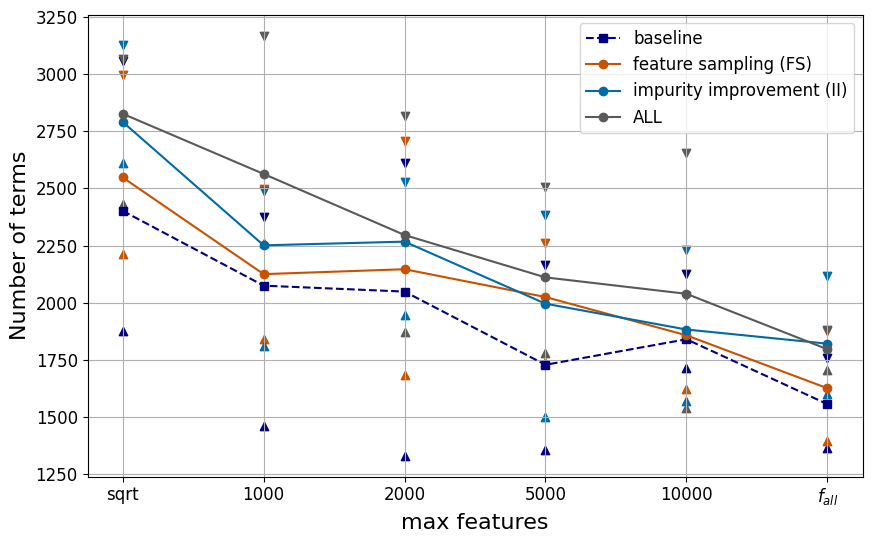

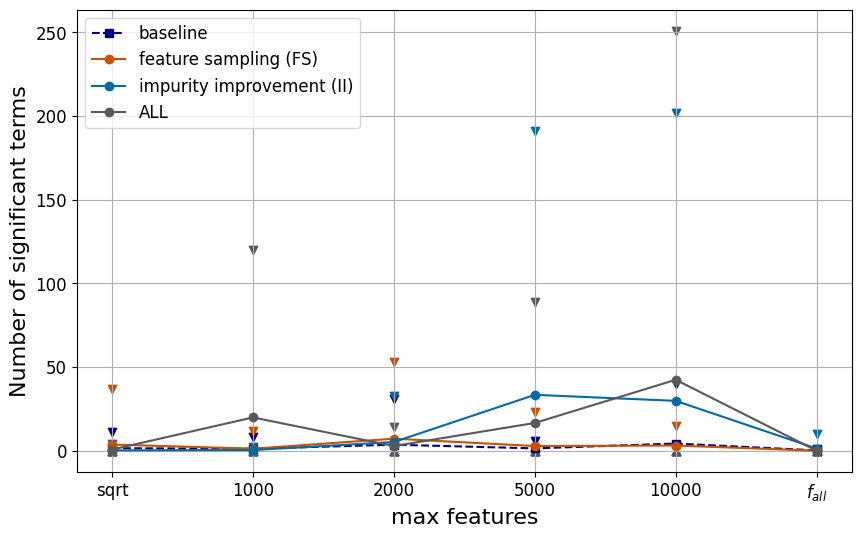

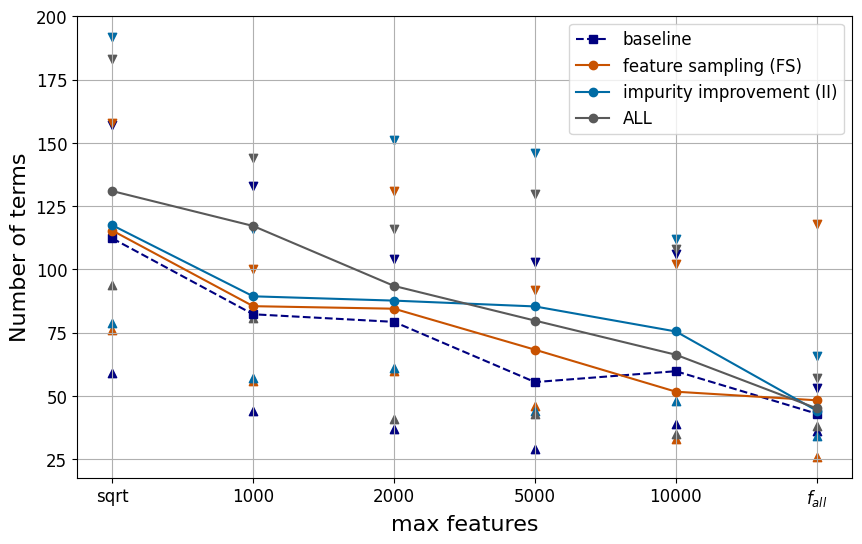

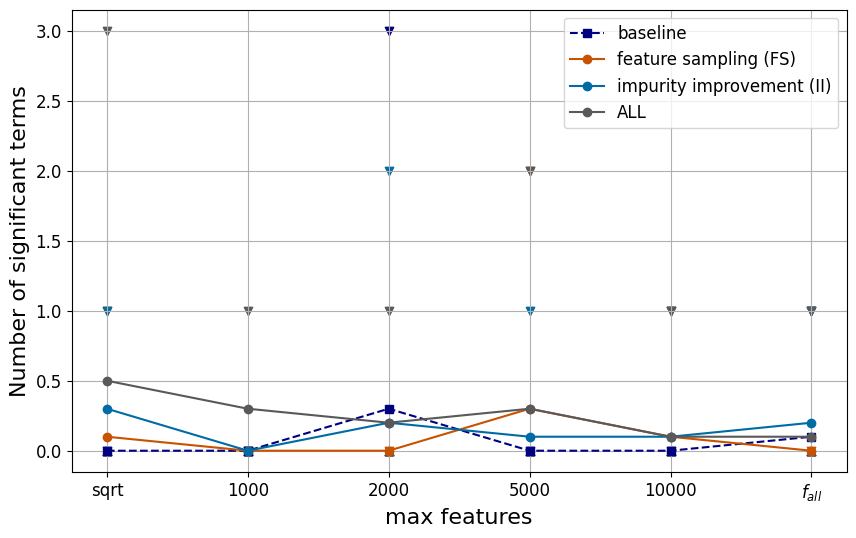

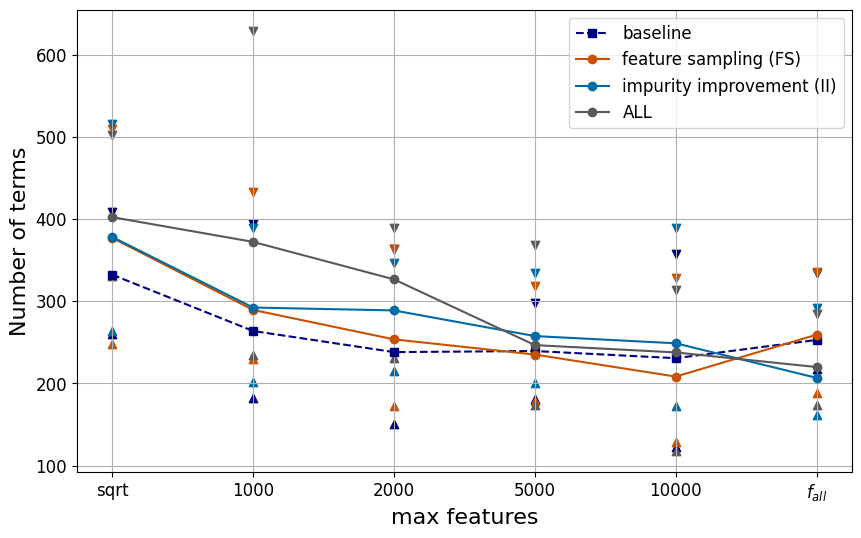

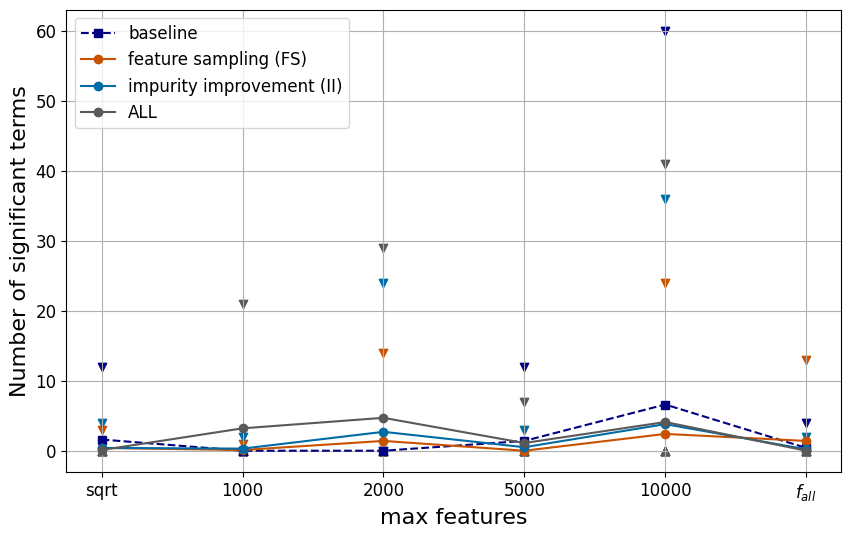

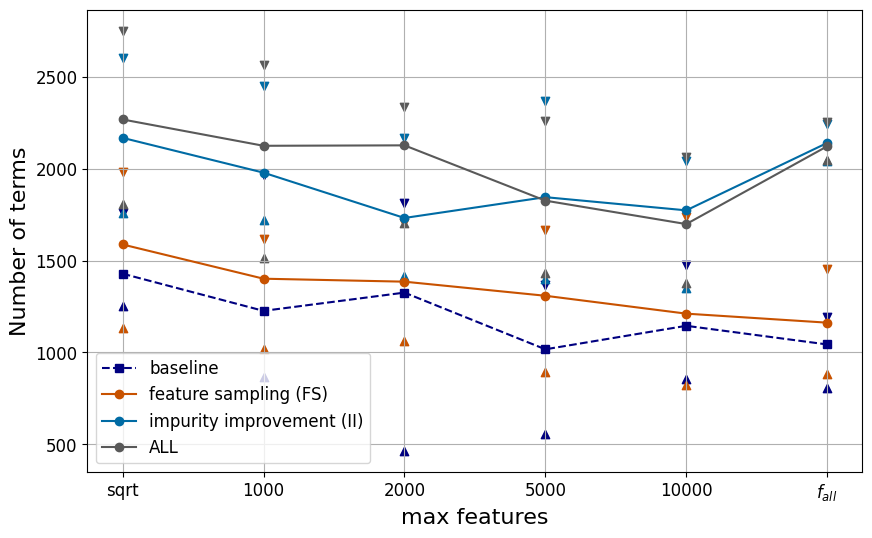

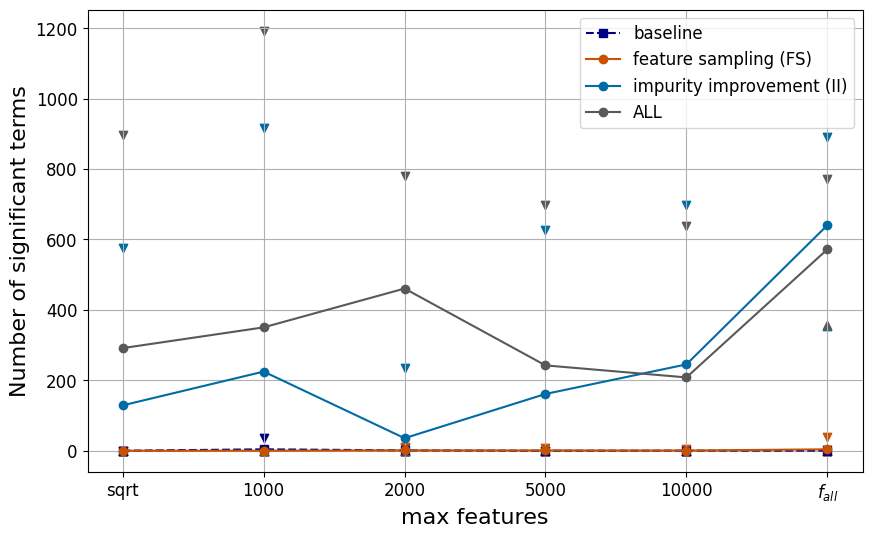

In [28]:
configurations = ['baseline', 'feature sampling (FS)', 'impurity improvement (II)', 'ALL']
for pk in plots_keys:

    # n terms 
    mean_values = {config: [] for config in configurations}
    min_values = {config: [] for config in configurations}
    max_values = {config: [] for config in configurations}
    for max_features in max_features_values:

        file = f"{pk}_results_features_dt_" + max_features + ".csv"
        print(file)
        df = pd.read_csv(os.path.join(results_dire, file), index_col=0)
        mean_values['ALL'].append(float(df['n_terms mean'].loc['all_' + max_features + '.json'].split(' +/-')[0]))
        min_values['ALL'].append(float(df['n_terms median'].loc['all_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[0]))
        max_values['ALL'].append(float(df['n_terms median'].loc['all_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[1]))
        mean_values['baseline'].append(float(df['n_terms mean'].loc['no_gis_' + max_features + '.json'].split(' +/-')[0]))
        min_values['baseline'].append(float(df['n_terms median'].loc['no_gis_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[0]))
        max_values['baseline'].append(float(df['n_terms median'].loc['no_gis_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[1]))
        mean_values['impurity improvement (II)'].append(float(df['n_terms mean'].loc['imp_' + max_features + '.json'].split(' +/-')[0]))
        min_values['impurity improvement (II)'].append(float(df['n_terms median'].loc['imp_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[0]))
        max_values['impurity improvement (II)'].append(float(df['n_terms median'].loc['imp_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[1]))
        mean_values['feature sampling (FS)'].append(float(df['n_terms mean'].loc['fs_' + max_features + '.json'].split(' +/-')[0]))
        min_values['feature sampling (FS)'].append(float(df['n_terms median'].loc['fs_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[0]))
        max_values['feature sampling (FS)'].append(float(df['n_terms median'].loc['fs_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[1]))

    plt.figure(figsize=(10, 6))
    for i,config in enumerate(configurations):
        
        if configurations[i] == "baseline":
            plt.plot(max_features_values_new, mean_values[config], marker='s', label=configurations[i], color=colors[i], linestyle='--')
        else:
            plt.plot(max_features_values_new, mean_values[config], marker='o', label=configurations[i], color=colors[i])
        #plt.fill_between(max_features_values, np.array(accuracies) - np.array(f1_stds[i]), np.array(accuracies) + np.array(f1_stds[i]), alpha=0.2)
        plt.scatter(max_features_values_new, min_values[config], color=colors[i], marker="^")
        plt.scatter(max_features_values_new, max_values[config], color=colors[i], marker="v")
    plt.xlabel("max features", fontsize=16)
    plt.ylabel("Number of terms", fontsize=16)
    #plt.title("Accuracy across n_estimators for each configuration")
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=12)
    #plt.ylim(20, 100)
    plt.savefig(os.path.join(dire_results,f"{pk}_n_terms.pdf"), format='pdf', bbox_inches='tight',pad_inches = 0, dpi=1200)

    # sig terms
    mean_values = {config: [] for config in configurations}
    min_values = {config: [] for config in configurations}
    max_values = {config: [] for config in configurations}
    for max_features in max_features_values:

        file = f"{pk}_results_features_dt_" + max_features + ".csv"
        print(file)
        df = pd.read_csv(os.path.join(results_dire, file), index_col=0)
        mean_values['ALL'].append(float(df['sig mean'].loc['all_' + max_features + '.json'].split(' +/-')[0]))
        min_values['ALL'].append(float(df['sig median'].loc['all_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[0]))
        max_values['ALL'].append(float(df['sig median'].loc['all_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[1]))
        mean_values['baseline'].append(float(df['sig mean'].loc['no_gis_' + max_features + '.json'].split(' +/-')[0]))
        min_values['baseline'].append(float(df['sig median'].loc['no_gis_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[0]))
        max_values['baseline'].append(float(df['sig median'].loc['no_gis_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[1]))
        mean_values['impurity improvement (II)'].append(float(df['sig mean'].loc['imp_' + max_features + '.json'].split(' +/-')[0]))
        min_values['impurity improvement (II)'].append(float(df['sig median'].loc['imp_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[0]))
        max_values['impurity improvement (II)'].append(float(df['sig median'].loc['imp_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[1]))
        mean_values['feature sampling (FS)'].append(float(df['sig mean'].loc['fs_' + max_features + '.json'].split(' +/-')[0]))
        min_values['feature sampling (FS)'].append(float(df['sig median'].loc['fs_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[0]))
        max_values['feature sampling (FS)'].append(float(df['sig median'].loc['fs_' + max_features + '.json'].split('[')[1].split(']')[0].split(', ')[1]))

    plt.figure(figsize=(10, 6))
    for i,config in enumerate(configurations):
        
        if configurations[i] == "baseline":
            plt.plot(max_features_values_new, mean_values[config], marker='s', label=configurations[i], color=colors[i], linestyle='--')
        else:
            plt.plot(max_features_values_new, mean_values[config], marker='o', label=configurations[i], color=colors[i])
        #plt.fill_between(max_features_values, np.array(accuracies) - np.array(f1_stds[i]), np.array(accuracies) + np.array(f1_stds[i]), alpha=0.2)
        plt.scatter(max_features_values_new, min_values[config], color=colors[i], marker="^")
        plt.scatter(max_features_values_new, max_values[config], color=colors[i], marker="v")
    plt.xlabel("max features", fontsize=16)
    plt.ylabel("Number of significant terms", fontsize=16)
    #plt.title("Accuracy across n_estimators for each configuration")
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=12)
    #plt.ylim(20, 100)
    plt.savefig(os.path.join(dire_results,f"{pk}_sig.pdf"), format='pdf', bbox_inches='tight',pad_inches = 0, dpi=1200)
